<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР. <b>Статистика</b></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Основные термины и обозначения</a></li>
        <li><a href="#2">Центральная предельная теорема</a>
        <li><a href="#3">Оценка параметров генеральной совокупности</a>
        <li><a href="#4">Доверительный интервал</a>
        <li><a href="#5">Проверка гипотез</a>
        <li><a href="#6">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подключение библиотек</b></p>

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(1, "../lib/")

In [3]:
import plot_stats as plot_stats

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Основные термины и обозначения</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Генеральная совокупность (population)</b></p>

<div>
<p>Основные характеристики генеральной совокупности (parameters):</p>
<ol>
<li>среднее значение (population mean) - $\mu$</li>
<li>дисперсия (population variance) - $\sigma^2$</li>
</ol>
</div>

<p>Среднее генеральной совокупности (population mean):</p>
<p> <center>$\mu = M(X) = \frac{1}{N}\sum_{i=1}^{N} x_i$, </center>
где $N$ - количество элементов в генеральной выборке.</p>

<p>Дисперсия генеральной совокупности (population variance)</p>
<p>$$\sigma^2 = D(X) = \frac{1}{N}\displaystyle\sum_{i=1}^{N} (x_i - \bar{x})^2$$</p>

<p><b>Выборка (sample)</b></p>

<div>
<p>Основные статистики выборки (statistics):</p>
<ol>
<li>среднее значение (sample mean) - $\bar{x}$</li>
<li>дисперсия (sample variance) - $s^2$</li>
</ol>
</div>

<p>Выборочное среднее значение (sample mean):</p>
<p><center>$\bar{x}=\dfrac{1}{n}\displaystyle\sum_{i=1}^{n} x_i$,</center>
где $n$ - количество элементов в выборке (размер выборки - sample size).</p>

<div>
<p>Выборочная дисперсия (sample variance):</p>
<p style="text-align:center">$s^2 = \dfrac{1}{n}\displaystyle\sum_{i=1}^{n} (x_i - \bar{x})^2$ для смещенной оценки (biased estimate),</p>
<p style="text-align:center">$\hat{s}^2 = \dfrac{1}{n-1}\displaystyle\sum_{i=1}^{n} (x_i - \bar{x})^2$ для несмещенной оценки (unbiased estimate)</p>
<p style="text-align:center">или</p>
<p style="text-align:center">$s_*^2 = \dfrac{1}{n}\displaystyle\sum_{i=1}^{n} (x_i - \mu)^2$ для <i>эффективной</i> оценки</p>
<p>Как правило, принимаем $s^2 \approx \hat{s}^2$ при $n > 30\text{-}40$ <p>
</div>

<p><b>Выборочное распределение (sampling distribution)</b></p>

<div>
<p>Основные характеристики выборочного распределения:</p>
<ol>
<li>среднее значение - $\mu_\bar{x}$ и $\mu_{s^2}$</li>
<li>дисперсия - $\sigma_\bar{x}^2$ и $\sigma_{s^2}^2$</li>
</ol>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Центральная предельная теорема</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Центральная предельная теорема - группа теорем, определяющих условия возникновения нормального закона распределения <b>/ <a href="https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0">wiki</a></b></p>

<p><b>Пример для среднего значения</b></p>

<p>Исходный закон распределение случайной величины</p>

In [4]:
x = np.arange(10)

fr = np.array([10, 20, 30, 20, 10, 15, 10, 20, 40, 10])
pk = fr / fr.sum()

# Создание собственного дискретного закона распределения
distribution = stats.rv_discrete(name="custom_distribution", values=(x, pk))

In [5]:
y_pmf = distribution.pmf(x)  # закон распределения случайной величины
y_cdf = distribution.cdf(x)  # функция распределения случайной величины

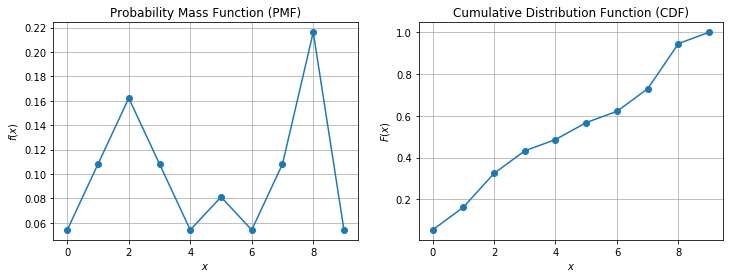

In [6]:
plt.figure(1, figsize=[12,4])

plt.subplot(1,2,1)
plt.title("Probability Mass Function (PMF)")
plt.plot(x, y_pmf, "o-")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.plot(x, y_cdf, "o-")
plt.grid(True)

<p>Характеристики (параметры) исходного распределения: $M(X)$, $D(X)$ и $\sigma$</p>

In [7]:
m = distribution.mean()
m

4.675675675675676

In [8]:
v = distribution.var()
v

8.219138056975893

In [9]:
sigma = distribution.std()
sigma

2.86690391484889

<p>Разовая выборка размером $n$</p>

In [10]:
n = 10

sample = distribution.rvs(size=n)

In [11]:
# xy = stats.itemfreq(sample)
# xy

In [12]:
elements, counts = np.unique(sample, return_counts=True)
elements, counts

(array([3, 4, 5, 7, 8, 9]), array([1, 1, 1, 1, 4, 2]))

In [13]:
xx = elements
yy_pmf = counts / len(sample)
yy_pmf

array([0.1, 0.1, 0.1, 0.1, 0.4, 0.2])

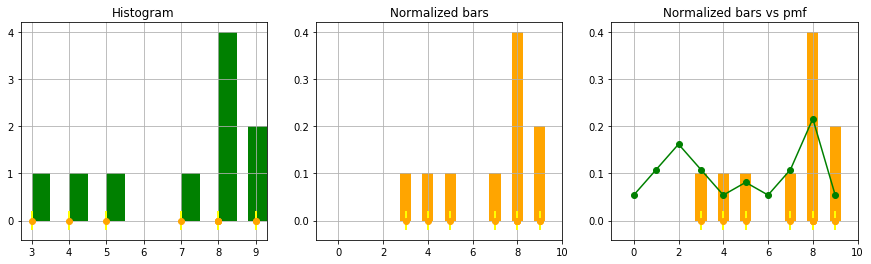

In [14]:
plt.figure(1, figsize=[15,4])

plt.subplot(1,3,1)
plt.title("Histogram")
plt.hist(sample, 30, density=False, color="green", width=0.5)

plt.vlines(sample, -0.2, 0.2, lw=2, color="yellow")
plt.plot(sample, np.zeros(len(sample)), "o", color="orange")
plt.grid(True)

plt.subplot(1,3,2)
plt.title("Normalized bars")
plt.bar(xx, yy_pmf, width=0.5, color="orange")
plt.xlim([-1, 10])
plt.grid(True)

plt.vlines(sample, -0.02, 0.02, lw=2, color="yellow")
plt.plot(sample, np.zeros(len(sample)), "o", color="orange")
plt.grid(True)

plt.subplot(1,3,3)
plt.title("Normalized bars vs pmf")
plt.bar(xx, yy_pmf, width=0.5, color="orange")
plt.plot(x, y_pmf,"go-")
plt.xlim([-1, 10])

plt.vlines(sample, -0.02, 0.02, lw=2, color="yellow")
plt.plot(sample, np.zeros(len(sample)), "o", color="orange")

plt.grid(True)

plt.show()

<p>Среднее значение выборки</p>

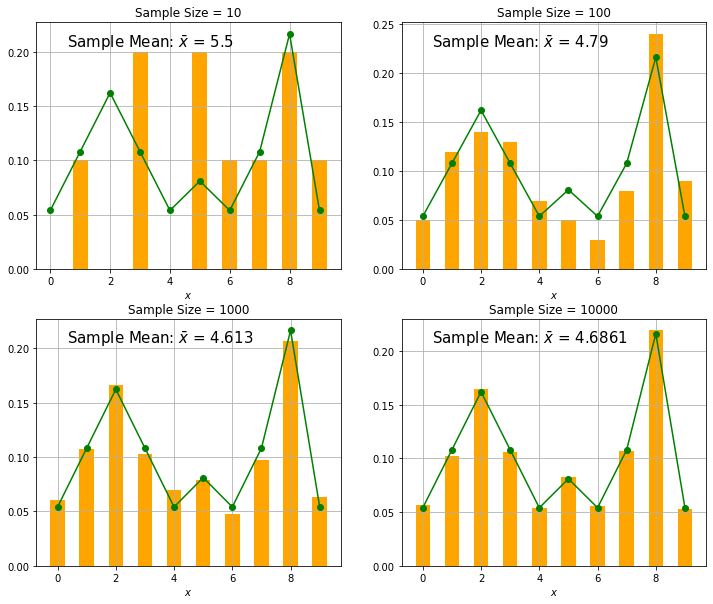

In [15]:
def plot_distribution(sample, num, x):
    
    elements, counts = np.unique(sample, return_counts=True)
    elements, counts
    
    xx = elements
    yy_pmf = counts / len(sample)
    
    plt.subplot(2,2,num)
    plt.annotate(r'Sample Mean: $\bar{x}$ = ' +  str(sample.mean()), (0.1,0.9), fontsize=15, xycoords='axes fraction')
    plt.title("Sample Size = "+str(10**(num)))
    
    plt.bar(xx, yy_pmf, width=0.5, color="orange")
    plt.plot(x, distribution.pmf(x),"go-")
    plt.xlabel("$x$")
    plt.grid(True)

samples = [distribution.rvs(size=10**i) for i in range(1,5)]

plt.figure(1, figsize=[12,10])
[plot_distribution(samples[i-1], i, x) for i in range(1, 5)]
plt.show()

In [16]:
distribution.mean()

4.675675675675676

$m$ выборок размером n

In [17]:
n = 10   #  размер выборки (sample size)
m = 10   #  количество выборок (number of samples)

xm = np.array([distribution.rvs(size=n).mean() for _ in range(m)])
xm

array([4.1, 5.1, 4.2, 5.5, 4. , 4. , 5. , 7.2, 6.7, 4.9])

In [18]:
def plot_means(distr, num_samples, sample_size, plot_id):
    plt.subplot(2,2,plot_id)
    plt.title(("Number of Samples = %d, Sample Size = %d") % (num_samples, sample_size))
    plt.annotate("Mean of Samples Mean: $\\hat{\mu}_{\\bar{x}} = %.3f$" %  np.mean(distr), 
                 (0.05,0.95), fontsize=12, xycoords='axes fraction')
    plt.annotate("Var of Samples Mean: $\\hat{\\sigma}_{\\bar{x}} = %.3f$" % np.var(distr), 
                 (0.05,0.88), fontsize=12, xycoords='axes fraction')
    plt.hist(distr, 30, color="orange", density=True)
    plt.grid(True)

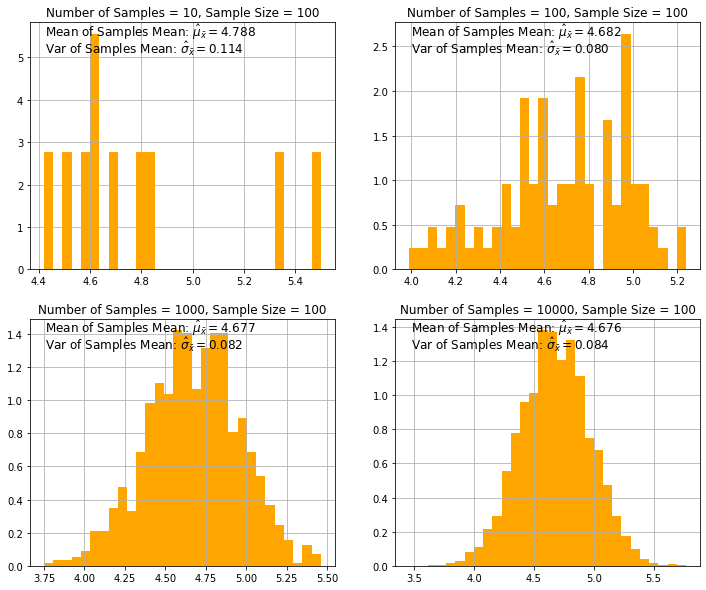

In [19]:
n = 100

sample_means = [[distribution.rvs(size=n).mean() for _ in range(10**i)] for i in range(1,5)]
plt.figure(1, figsize=[12,10])
[plot_means(sample_means[i-1], 10**i, n, i) for i in range(1, 5)]
plt.show()

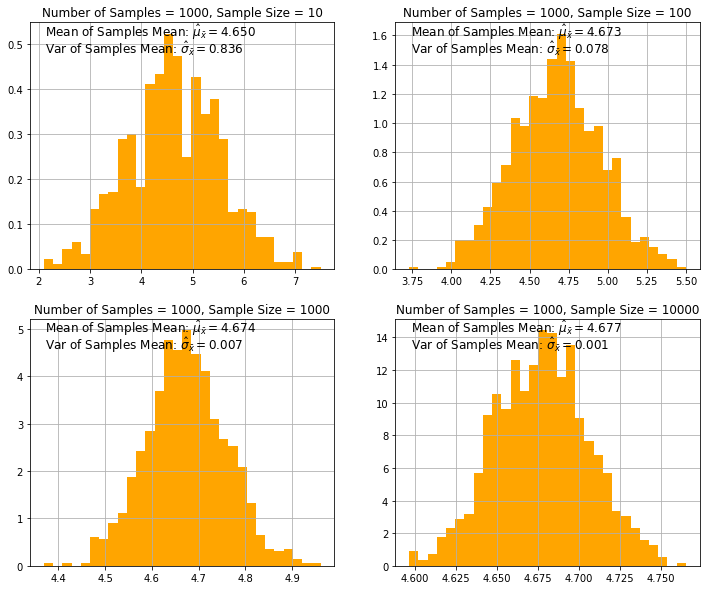

In [20]:
m = 1000

sample_means = [[distribution.rvs(size=10**i).mean() for _ in range(m)] for i in range(1,5)]
plt.figure(1, figsize=[12,10])
[plot_means(sample_means[i-1], m, 10**i, i) for i in range(1, 5)]
plt.show()

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Оценка параметров генеральной совокупности</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a name="3a"></a>
<div style="display:table; width:100%">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            a. Оценка среднего значения генеральной совокупности $\mu$ по данным выборки
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style="display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#3">Назад</a>
            </div>
            <div style="display:table-cell; width:10%; text-align:center;">
                <a href="#3b">Далее</a>
            </div>
        </div>
    </div>
</div>

<p><i>Для повторной выборки (with replacement)</i></p>

<p>Выборочное среднее значение (sample mean) $\bar{x}$ есть несмещенная и состоятельная оценка средней генеральной совокупности $\mu$, т.е.</p>
<p> <center>$\mu_{\bar{x}} = M(\bar{x}) = \mu$, </center><br>
где $\mu_{\bar{x}}$ - среднее значение выборочного распределения средних (mean of sampling distribution of the sample mean).</p>

<p>Дисперсия выборочного распределения средних (variance of sampling distribution of the sample mean)</p>
<p>$$\sigma_{\bar{x}}^2 = D(\bar{x})= \frac{\sigma^2}{n}$$</p>

<p>Стандартная ошибка выборки (standard error of the mean - $SE_\bar{x}$)</p>
$$SE_\bar{x} = \sqrt{\dfrac{\sigma^2}{n}} \approx \sqrt{\dfrac{s^2}{n}}$$

<a name="3b"></a>
<div style="display:table; width:100%">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            b. Оценка дисперсии генеральной совокупности $\sigma$  по данным выборки 
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style="display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#3a">Назад</a>
            </div>
            <div style="display:table-cell; width:10%; text-align:center;">
                <a href="#4">Далее</a>
            </div>
        </div>
    </div>
</div>

<p><i>Для повторной выборки (with replacement)</i></p>

<p>Выборочная дисперсия (variance mean) $s^2$ есть смещенная и состоятельная оценка дисперсии генеральной совокупности выборки $\sigma$, т.е.</p>
<p>$$\mu_{s^2} = M(s^2)= \dfrac{n-1}{n}\sigma^2$$ </p>

<p>Выборочная дисперсия $\hat{s}^2$ есть несмещенная и состоятельная оценка дисперсии генеральной совокупности выборки $\sigma$, т.е.</p>
<p>$$\mu_{\hat{s}^2}  = M(\hat{s}^2) = \sigma^2$$</p>

<p>При больших $n$ $\text{  } $$\mu_{s^2}\approx \mu_{\hat{s}^2}$</p>

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Доверительный интервал</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Оценка параметра (доли, среднего значения, дисперсии) генеральной совокупности (population) по данным выборки (sample)</p>

<p><i><b>Доверительный интервал для генеральной средней</b></i></p>
<p><center>$\bar{x} - \Delta \leq \mu_\bar{x} \leq \bar{x} - \Delta$, </center><br>
где $\Delta$ - предельная ошибка (margin of error).</p>

<p><i>Уровень доверия</i> (confidence level) $\gamma$</p>
<p>Вероятность того, что отклонение выборочной средней $\bar{x}$ не превзойдет число $\Delta$</p>
<p>$$P(\left|\bar{x} - \mu_{\bar{x}}\right|\leq \Delta)=\gamma$$</p>

<p><b><i>Интерпретация доверительного интервала</i></b></p>
<p style="text-align:center">X%-ая уверенность, что параметр генеральной совокупности (например, среднее значение) лежит в определенном интервале. </p>

<p>Уровень доверия определяет насколько вероятно, что параметр <i>накрывается</i> доверительным интервалом</p>
<p><span style="color:red; font-weight:bold">ВАЖНО!</span> Это не означает, что интервал <i>содержит</i> параметр генеральной совокупности с определенной вероятностью</p>

<div>
<p><i><b>Доверительный интервал для нормального выборочного распределения:</b></i></p>
<ul>
<li>наблюдения в выборке независимы (размер выборки меньше 10% от генеральной совокупности)</li>
<li>большой размер выборки ($n$ больше 30)</li>
<li>распределение генеральной совокупности не имеет ярко выраженной скошенности (not strongly skewed)</li>
</ul>
</div>

<p>Доверительный интервал для среднего</p>
<p>$$\bar{x} - z \cdot SE_\bar{x}  \leq \mu_\bar{x} \leq \bar{x} + z \cdot SE_\bar{x}$$</p>

Если известны размер выборки $n$, выборочное среднее значение $\bar{x}$, выборочная дисперсия $s^2$ и среднее значение  $\mu$, то вероятность того, что среднее значение случайной выборки $\bar{X}$ будет меньше или равно $\bar{x}$, вычисляется следующим образом

<center><div style="display:table; width:35%">
    <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">1)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$SE_\bar{x} = \sqrt{\dfrac{\sigma^2}{n}} \approx \sqrt{\dfrac{s^2}{n}}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">2)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$z = \dfrac{\bar{x} - \mu_{\bar{x}}}{\sigma_\bar{x}} = \dfrac{\bar{x} - \mu}{SE_\bar{x}}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">3)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$P(\bar{X} \leq \bar{x})=P(Z \leq z)=\Phi_N(z)$</div>
    </div>
</div></center>

Если задана предельная ошибка $\Delta$ и известны размер выборки $n$, выборочное среднее значение $\bar{x}$ и выборочная дисперсия $s^2$, то доверительная вероятность $\gamma$ вычисляется следующим образом:

<center><div style="display:table; width:35%">
    <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">1)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$SE_\bar{x} = \sqrt{\dfrac{\sigma^2}{n}} \approx \sqrt{\dfrac{s^2}{n}}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">2)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$z = \dfrac{\bar{x} - \mu_{\bar{x}}}{\sigma_\bar{x}} = \dfrac{\bar{x} - \mu_{\bar{x}}}{SE_\bar{x}}=\dfrac{\Delta}{SE_\bar{x}}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">3)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$P(\left|\bar{x} - \mu_{\bar{x}}\right|\leq \Delta)=\Phi_N(z)-\Phi_N(-z)=\gamma$</div>
    </div>
</div></center>

<p>Если задан уровень доверия $\gamma$ и известны размер выборки $n$, выборочное среднее значение $\bar{x}$ и выборочная дисперсия $s^2$, то доверительный интервал рассчитывается следующим образом:</p>

<center><div style="display:table; width:30%">
    <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">1)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$SE_\bar{x} = \sqrt{\dfrac{\sigma^2}{n}} \approx \sqrt{\dfrac{s^2}{n}}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">2)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$\Phi_N(z) =0.5 + \dfrac{\gamma}{2} \to z$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">3)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$\bar{x} - z \cdot SE_\bar{x}  \leq \mu_\bar{x} \leq \bar{x} + z \cdot SE_\bar{x}$</div>
    </div>
</div></center>

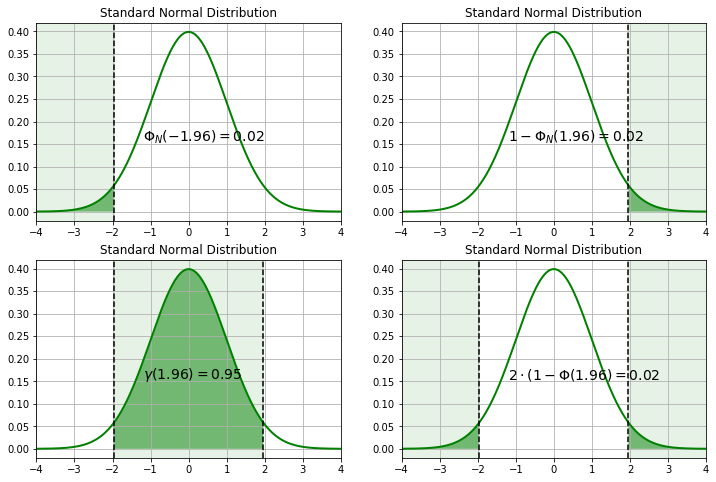

In [21]:
plt.figure(1, figsize=[12, 8])

plt.subplot(2,2,1)
plot_stats.plot_one_tailed_left_normal_distribution([-4,4], -1.96)
plt.subplot(2,2,2)
plot_stats.plot_one_tailed_right_normal_distribution([-4,4], 1.96)
plt.subplot(2,2,3)
plot_stats.plot_two_tailed_normal_distribution([-4,4], 1.96)
plt.subplot(2,2,4)
plot_stats.plot_two_tailed_outside_normal_distribution([-4,4], 1.96)

plt.show()

<p>Графики</p>

<div>
<p><i><b>Доверительный интервал для выборки небольших размеров ($n$ меньше 30)</b></i></p>
<ul>
<li>наблюдения (элементы выборки) в выборке независимы (размер выборки меньше 10% от генеральной совокупности)</li>
<li>наблюдения должны подчиняться нормальному закону</li>
</ul>
</div>

<p>$$\bar{x} - t_{df} \cdot SE_\bar{x}  \leq \mu_\bar{x} \leq \bar{x} + t_{df} \cdot SE_\bar{x}$$</p>

Если известны размер выборки $n$, выборочное среднее значение $\bar{x}$, выборочная дисперсия $s^2$ и среднее значение  $\mu$, то вероятность того, что среденее значение случайной выборки $\bar{X}$ будет меньше или равно $\bar{x}$, вычисляется следующим образом

<center><div style="display:table; width:35%">
    <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">1)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$SE_\bar{x} = \sqrt{\dfrac{\sigma^2}{n}} \approx \sqrt{\dfrac{s^2}{n}}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">2)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$t_{df} = \dfrac{\bar{x} - \mu_{\bar{x}}}{\sigma_\bar{x}} = \dfrac{\bar{x} - \mu}{SE_\bar{x}}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">3)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$P(\bar{X} \leq \bar{x})=P(T_{df} \leq t_{df})=F_{one}(t_{df})$</div>
    </div>
</div></center>

Если задана предельная ошибка $\Delta$ и известны размер выборки $n$, выборочное среднее значение $\bar{x}$ и выборочная дисперсия $s^2$, то доверительная вероятность $\gamma$ вычисляется следующим образом:

<center><div style="display:table; width:35%">
    <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">1)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$SE_\bar{x} = \sqrt{\dfrac{\sigma^2}{n}} \approx \sqrt{\dfrac{\hat{s}^2}{n}}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">2)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$t_{df} = \dfrac{\bar{x} - \mu_{\bar{x}}}{\sigma_\bar{x}} = \dfrac{\bar{x} - \mu_{\bar{x}}}{SE_\bar{x}}=\dfrac{\Delta}{SE_\bar{x}}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">3)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$P(\left|\bar{x} - \mu_{\bar{x}}\right|\leq \Delta)=1-F_{two}(t_{df})=\gamma$</div>
    </div>
</div></center>

<p>Если задан уровень доверия $\gamma$ и известны размер выборки $n$, выборочное среднее значение $\bar{x}$ и выборочная дисперсия $s^2$, то доверительный интервал рассчитывается следующим образом:</p>

<center><div style="display:table; width:30%">
    <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">1)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$SE_\bar{x} = \sqrt{\dfrac{\sigma^2}{n}} \approx \sqrt{\dfrac{\hat{s}^2}{n}}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">2)</div>
        <div style="display:table-cell; width:90%; padd|ing:10px;">$F_{two}(t_{df}) =1 - \gamma \to t_{df}$</div>
    </div>
        <div style="display:table-row;">
        <div style="display:table-cell; width:10%; padding:10px;">3)</div>
        <div style="display:table-cell; width:90%; padding:10px;">$\bar{x} - t_{df} \cdot SE_\bar{x}  \leq \mu_\bar{x} \leq \bar{x} + t_{df} \cdot SE_\bar{x}$</div>
    </div>
</div></center>

<p>График $t_{df}$</p>

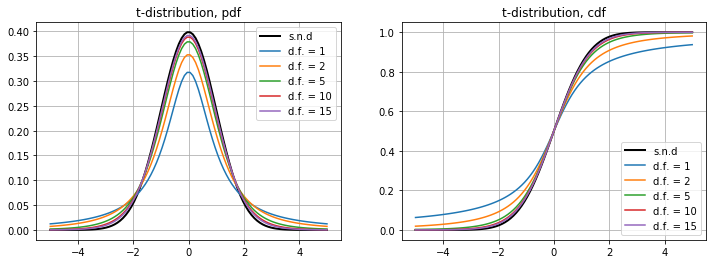

In [22]:
x = np.linspace(-5, 5, 100)
y_pdf = stats.norm.pdf(x, loc=0, scale=1)
y_cdf = stats.norm.cdf(x, loc=0, scale=1)

adf = [1,2,5,10, 15]

plt.figure(1, figsize=[12, 4])

legs = ["d.f. = " + str(adf[i]) for i in range(len(adf))]
legs.insert(0, "s.n.d")
plt.subplot(1,2,1)
plt.title("t-distribution, pdf")
plt.plot(x, y_pdf, lw=2, color="black")
for i in adf:
    pd = stats.t.pdf(x, i)
    plt.plot(x,pd)
plt.legend(legs, loc="upper right")

plt.grid(True)

plt.subplot(1,2,2)
plt.title("t-distribution, cdf")
plt.plot(x, y_cdf, lw=2, color="black")
for i in adf:
    pd = stats.t.cdf(x, i)
    plt.plot(x,pd)
plt.legend(legs, loc="lower right")
plt.grid(True)
plt.show()

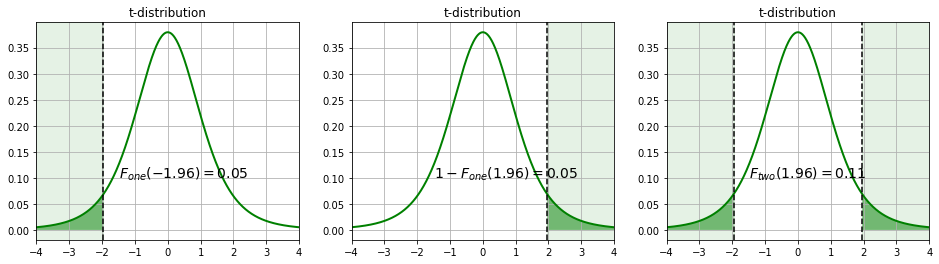

In [23]:
plt.figure(1, figsize=[16, 4])

plt.subplot(1,3,1)
plot_stats.plot_one_tailed_left_tdistribution([-4,4], -1.96, 5)
plt.subplot(1,3,2)
plot_stats.plot_one_tailed_right_tdistribution([-4,4], 1.96, 5)
plt.subplot(1,3,3)
plot_stats.plot_two_tailed_tdistribution([-4,4], 1.96, 5)
plt.show()

<p>Условия использования z-значений</p>

<p>Вероятность того, что отклонение выборочной средней не превзойдет число $\Delta$</p>

$$P(\left|\bar{x} - \mu_{\bar{x}}\right|\leq \Delta)=\Phi(z)$$ - доверительная вероятность

$$\Delta = z\sigma_\bar{x}$$

<p><b>Пример</b></p>

<p>Среднее потребление воды 2 литра с дисперсией 0.7. Случайно выбраны 50 человек. Какая вероятность того, что им не хватит 110 литров воды?</p>

In [24]:
vol = 110
n = 50
mu =  2
sigma = 0.7

# 1) Среднее потребление воды человеком, чтобы хватило равно 110 литров
x_bar = vol / n
print("x_bar\t = {:0.2f}".format(x_bar))

# 2) Вычисляем стандартную ошибку SE
se = sigma / np.sqrt(n)
print("SE\t\t = {:0.2f}".format(se))

# 3) Определяем z
z = (x_bar - mu) / se
print("z\t\t = {:0.2f}".format(z))

# 4) Рассчитываем вероятность того, что в среднем на каждого придется меньше или равно x_bar литров
p = stats.norm.cdf(z, loc=0, scale=1)
print("p\t\t = {:0.2f}".format(p))

# 5) Вероятность того, что им не хватит 110 литров воды
p_res = 1 - p
print("p_res\t = {:0.2f}".format(p_res))

x_bar	 = 2.20
SE		 = 0.10
z		 = 2.02
p		 = 0.98
p_res	 = 0.02


In [25]:
#Проверка
1 - stats.norm.cdf(x_bar, loc=mu, scale=se)

0.021675875630431274

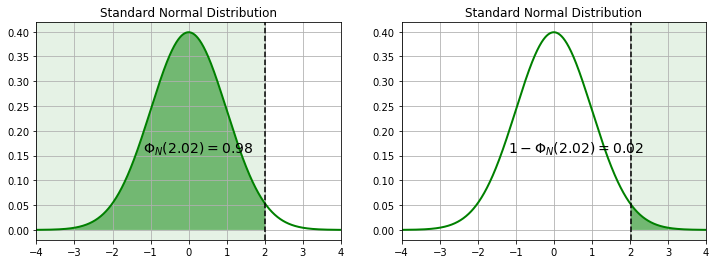

In [26]:
plt.figure(1, figsize=[12, 4])

plt.subplot(1,2,1)
plot_stats.plot_one_tailed_left_normal_distribution([-4,4], z)
plt.subplot(1,2,2)
plot_stats.plot_one_tailed_right_normal_distribution([-4,4], z)

plt.show()

<a name="5"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">5. Проверка гипотез</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a name="5a"></a>
<div style="display:table; width:100%">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            a. Общие сведения 
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style="display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#5">Назад</a>
            </div>
            <div style="display:table-cell; width:10%; text-align:center;">
                <a href="#5b">Далее</a>
            </div>
        </div>
    </div>
</div>

<p>Нулевая гипотеза $H_0$ - наблюдаемые данные соответствуют ранее полученным, нет изменений</p>
<p>Альтернативная гипотеза $H_A$ - наблюдаемые данные отличаются от ранее полученных, есть изменения</p>

<table>
<tr>
<th>Гипотеза $H_0$</th>
<th>Принимается</th>
<th>Отвергается</th>
</tr>
<tr>
<td><b>Верна</b></td>
<td>Правильное решение</td>
<td>Ошибка 1-го рода</td>
</tr>
<tr>
<td><b>Неверна</b></td>
<td>Ошибка 2-го рода</td>
<td>Правильное решение</td>
</tr>
</table>

<p><i>p-значение</i> (p-value) - вероятность наблюдения данных, которые были бы в пользу альтернативной гипотезы, также как и текущие данные, если нулевая гипотеза верна.</p>

<p>Малая величина p-value означает, что если нулевая гипотеза верна, то существует малая вероятность наблюдения данных по крайней мере на столько же экстремальных, как мы получили. p-value получают после проведения эксперимента, исследования.</p>

<p><i>Уровень значимости</i> (significance level) $\alpha$ - вероятность допустить ошибку 1-го рода, т.е. отвергнуть гипотезу $H_0$, когда она верна. <i>Уровень значимости</i> - допустимый уровень ошибки, устанавливается до проведения эксперимента, исследования.</p>

<p style="text-align:center">При <i>p-value</i> меньшем уровня значимости $\alpha$ отвергается нулевая гипотеза $H_0$</p>

In [27]:
def get_se(sigma, n):
    return sigma / np.sqrt(n)

def get_se_two(sigma1, n1, sigma2, n2):
    return np.sqrt(sigma1**2 / n1 + sigma2**2 / n2)

def get_dof_two(sigma1, n1, sigma2, n2):
    """Calculate a degree of freedom using Welch–Satterthwaite equation."""
    return (sigma1**2/n1 + sigma2**2/n2)**2/((sigma1**2)**2/(n1**2*(n1-1)) + (sigma2**2)**2/(n2**2*(n2-1)))

def get_z(x, mu, se):
    return (x - mu) / se

def get_prob_by_x(x, mu, se):
    return stats.norm.cdf(x, loc=mu, scale=se)

def get_prob_by_z(z):
    return stats.norm.cdf(z, loc=0, scale=1)

def get_z_by_prob_for_two_tailed(pr):
    return stats.norm.ppf((1-pr)/2, loc=0, scale=1)

def get_z_by_alpha_for_two_tailed(alpha):
    return stats.norm.ppf(alpha/2, loc=0, scale=1)

def get_z_by_prob_for_one_tailed(pr):
    return stats.norm.ppf(1-pr, loc=0, scale=1)

def get_pvalue_for_one_tailed_norm(z):
    return 1 - stats.norm.cdf(z, loc=0, scale=1)

def get_pvalue_for_two_tailed_norm(z):
    return 2 * (stats.norm.cdf(-abs(z), loc=0, scale=1))

def get_pvalue_for_two_tailed_tdistribution(t, df):
    return 2 * stats.t.cdf(-abs(t), df=df)

def get_pvalue_for_one_tailed_tdistribution(t, df):
    return 1 - stats.t.cdf(t, df=df)

<a name="5b"></a>
<div style="display:table; width:100%">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-style:italic; font-weight:bold; font-size:12pt">
            b. Проверка гипотез со средним значением
        </div>
        <div style="display:table-cell; border:1px solid lightgrey; width:20%">
            <div style="display:table-cell; width:10%; text-align:center; background-color:whitesmoke;">
                <a href="#5a">Назад</a>
            </div>
            <div style="display:table-cell; width:10%; text-align:center;">
                <a href="#6">Далее</a>
            </div>
        </div>
    </div>
</div>

<p><b>Одна выборка</b></p>

<p>Если известны $\mu_{prev}$, $n$, $\bar{x}_{curr}$, $s_{curr}$, то:</p>
<p>$$H_0: \mu_{prev}=\mu_{curr}$$<p>
<p>$$H_A: \mu_{prev} \neq \mu_{curr}$$<p>

<p><b><i>Пример</i></b></p>

<p>Среднее потребление человеком воды в 2014 было 2 литра. Для оценки среднего потребления в 2015 году были случайно выбраны 100 человек. В резльтате получены следующие данные по выборке: среднее потребление воды 2.3, выборочная дисперсия 0.5. На основании выборки можно ли утверждать, что среднее потребление воды изменилось в 2015 по сравнению с 2014? Допустимый уровень ошибки 1-го рода 0.05.</p>

<p>$$H_0: \mu_{2014}=\mu_{2015}$$<p>

In [28]:
mu_2014 = 2
x_bar_2015 = 2.3
s_2015 = 1
n = 110
alpha = 0.05

# 1) Вычисляем стандартную ошибку SE
se = get_se(s_2015, n)
print("1) SE \t\t= {:0.4f}".format(se))

# 2) Z-score
z = get_z(x_bar_2015, mu_2014, se)
print("2) z-score \t= {:0.2f}".format(z))

# 3) P-Value 
pvalue = get_pvalue_for_two_tailed_norm(z)
print("3) p-value \t= {:0.6f}".format(pvalue))

print("4) alpha \t\t= {:0.4f}".format(alpha))

if alpha > pvalue:
    print("5) alpha > p-value")
    print("\nОтказываемся от нулевую гипотезы: полагаем, что потребление воды отличается в 2014 и 2015\n")
else:
    print("5) alpha <= p-value")
    print("\nПринимаем нулевую гипотезу: нет достаточных доказательств, что потребление различно в 2014 и 2015")

1) SE 		= 0.0953
2) z-score 	= 3.15
3) p-value 	= 0.001653
4) alpha 		= 0.0500
5) alpha > p-value

Отказываемся от нулевую гипотезы: полагаем, что потребление воды отличается в 2014 и 2015



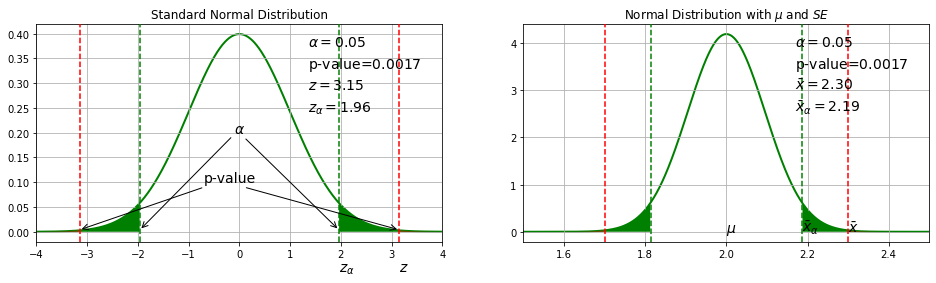

In [29]:
plt.figure(1, figsize=[16,4])

plt.subplot(1,2,1)
plot_stats.plot_two_tailed_pvalue_for_standard_norm(z, alpha, xlim=(-4,4))
plt.subplot(1,2,2)
plot_stats.plot_two_tailed_pvalue_for_norm(x_bar_2015, mu_2014, se, alpha, xlim=(1.5, 2.5))

plt.show()

***Пример 2***

Генеральная совокупность (неизвестна)

In [30]:
mu_2020 = 70
sigma_2020 = 30
population_2020 = stats.norm.rvs(size=10000, loc=mu_2020, scale=sigma_2020, random_state=1)

Выборка

In [31]:
n = 50

np.random.seed(1)
sample_2020 = np.random.choice(population_2020, n, replace=False)
sample_2020

array([ 78.28746725, 111.77099558,  87.25127327,  50.20481882,
        73.33889289,  94.39182863,  97.30223917,  50.98623839,
        66.69709125,  90.89263153,  39.40333948,  69.07596064,
        89.45762786,  52.38912985,  71.72447793,  55.39794763,
        44.21772904,  91.73681343,  78.66222911,  -9.22091771,
        83.74888891,  93.89592396,  94.46801079,  84.6073106 ,
        35.6693278 ,  64.57239094,  32.24950248,  88.49345014,
        80.93333416,  77.55143289,  28.69350877,  78.5623275 ,
        89.33634337,  52.3670973 ,  71.15668756,  74.26754118,
        41.10136014,  80.63981459,  82.29654129,  73.40044766,
        35.22209639,  59.53047427,  56.35216472, 105.04360158,
        69.79528336,  94.39784382,  -7.60729898,  58.91829879,
        89.43549396,  52.52519303])

Исходные данные

In [32]:
mu_2019 = 65
alpha = 0.05  # уровень значимости

Определить

$$H_0: \mu_{2019}=\mu_{2020}$$
$$H_A: \mu_{2019} \neq \mu_{2020}$$

Проверка гипотезы $H_0$

In [33]:
# Среднее значение
x_bar_2020 = sample_2020.mean()
print("x_bar\t = {}".format(x_bar_2020))

# Стандартное отклонение (смещенная оценка)
s_2020 = sample_2020.std(ddof=0)
print("s\t\t = {}".format(s_2020))

# Стандартная ошибка
se_2020 = get_se(s_2020, n)
print("SE\t\t = {}".format(se_2020))

# z-score
z = get_z(x_bar_2020, mu_2019, se_2020)
print("z-score\t = {}".format(z))

# p-value 
pvalue = get_pvalue_for_two_tailed_norm(z)
print("p-value (normal)\t = {}".format(pvalue))

print("alpha \t= {}".format(alpha))

if alpha > pvalue:
    print("alpha > p-value")
    print("\nОтказываемся от нулевую гипотезы: полагаем, что данные отличаются в 2019 и 2020\n")
else:
    print("alpha <= p-value")
    print("\nПринимаем нулевую гипотезу: нет достаточных доказательств, что данные отличаются в 2019 и 2020")

x_bar	 = 68.11184413999284
s		 = 25.413252035397043
SE		 = 3.593976569246416
z-score	 = 0.8658498685330414
p-value (normal)	 = 0.38657249767079016
alpha 	= 0.05
alpha <= p-value

Принимаем нулевую гипотезу: нет достаточных доказательств, что данные отличаются в 2019 и 2020


*p-value* для t-распределения

In [34]:
df = n - 1  # степень свободы
s_t_2020 = sample_2020.std(ddof=1)
se_t_2020 = get_se(s_t_2020, n)
t = get_z(x_bar_2020, mu_2019, se_t_2020)
pvalue_t = get_pvalue_for_two_tailed_tdistribution(t, df)
print("t-score = {}".format(t))
print("p-value (t) = {}".format(pvalue_t))

t-score = 0.8571476389408718
p-value (t) = 0.39553618967329596


или

In [35]:
tvalue, pvalue_t = stats.ttest_1samp(sample_2020, mu_2019)
print("t-score (t) = {}".format(tvalue))
print("p-value (t) = {}".format(pvalue_t))

t-score (t) = 0.8571476389408718
p-value (t) = 0.39553618967329596


In [36]:
pvalue_t = 2 * stats.t.cdf(-abs(tvalue), df)
pvalue_t

0.39553618967329596

Графики

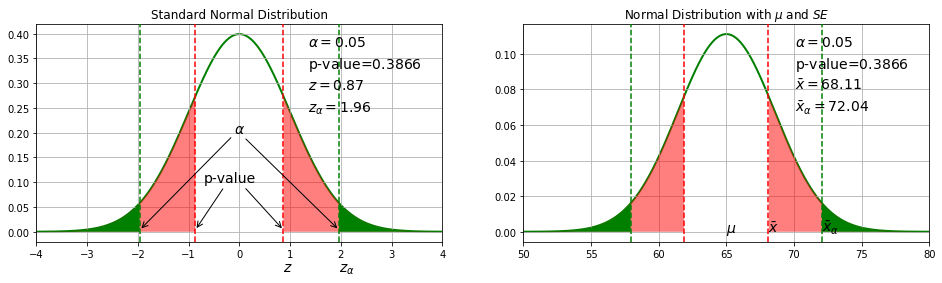

In [37]:
plt.figure(1, figsize=[16,4])

plt.subplot(1,2,1)
plot_stats.plot_two_tailed_pvalue_for_standard_norm(z, alpha, xlim=(-4,4))
plt.subplot(1,2,2)
plot_stats.plot_two_tailed_pvalue_for_norm(x_bar_2020, mu_2019, se_2020, alpha, xlim=(50, 80))

plt.show()

<p><b>Одна парная выборка</b></p>

<table width="30%">
    <tr>
        <th>Наблюдение</th>
        <th>$X_1$</th>
        <th>$X_2$</th>
        <th>$X_1-X_2$</th>
    </tr>
    <tr>
        <td>1</td>
        <td>$x_{1,1}$</td>
        <td>$x_{2,1}$</td>
        <td>$x_{\text{diff},1}$</td>
    </tr>
    <tr>
        <td>2</td>
        <td>$x_{1,2}$</td>
        <td>$x_{2,2}$</td>
        <td>$x_{\text{diff},2}$</td>
    </tr>
    <tr>
        <td>$\vdots$</td>
        <td>$\vdots$</td>
        <td>$\vdots$</td>
        <td>$\vdots$</td>
    </tr>
    <tr>
        <td>$n$</td>
        <td>$x_{1,n}$</td>
        <td>$x_{2,n}$</td>
        <td>$x_{\text{diff},n}$</td>
    </tr>
</table>

$$x_{\text{diff},i}=x_{1,i}-x_{2,i}$$

<p>Если известны $n$, $\bar{x}_{\text{diff}}$, $s_{\text{diff}}$, то:</p>

$$H_0: \mu_{\text{diff}}=0$$
$$H_A: \mu_{\text{diff}} \neq 0$$
    
$$SE_{{\bar{x}}_{diff}}=\sqrt{\frac{\sigma_{diff}^2}{n}}\approx\sqrt{\frac{s_{diff}^2}{n}}$$
$$z=\frac{{\bar{x}}_{diff}-0}{\sigma_{diff}}=\frac{{\bar{x}}_{diff}-0}{SE_{{\bar{x}}_{diff}}}$$

***Пример***

Генеральная совокупность (неизвестна)

In [38]:
mu_base = 70
sigma_base = 30
population_base = stats.norm.rvs(size=10000, loc=mu_base, scale=sigma_base, random_state=1)

mu_paired = 1
sigma_paired = 2
diff = stats.norm.rvs(size=10000, loc=mu_paired, scale=sigma_paired, random_state=1)
population_paired = np.array(list(zip(population_base, population_base + diff)))

Выборка

In [39]:
n = 50

sample_paired = population_paired[np.random.choice(len(population_paired), size=n, replace=False)]
sample_paired[:5]

array([[94.08356732, 96.68913847],
       [70.24839019, 71.26494954],
       [43.59863584, 42.8385449 ],
       [89.36737762, 91.65853613],
       [74.80111208, 76.12118622]])

Исходные данные

In [40]:
alpha = 0.05 #  уровень значимости

Определить

$$H_0: \mu_{\text{diff}}=0$$
$$H_A: \mu_{\text{diff}} \neq 0$$

Проверка гипотезы $H_0$

In [41]:
sample_diff = sample_paired[:,0] - sample_paired[:,1]
sample_diff[:5]

array([-2.60557115, -1.01655935,  0.76009094, -2.29115851, -1.32007414])

In [42]:
# Среднее значение
x_bar_diff = sample_diff.mean()
print("x_bar\t = {}".format(x_bar_diff))

# Стандартное отклонение (смещенная оценка)
s_diff = sample_diff.std(ddof=0)
print("s\t\t = {}".format(s_diff))

# Стандартная ошибка
se_diff = get_se(s_diff, n)
print("SE\t\t =", se_diff)

# z-score
z = get_z(x_bar_diff, 0, se_diff)
print("z-score\t = {}".format(z))

# p-value 
pvalue = get_pvalue_for_two_tailed_norm(z)
print("p-value (normal)\t = {}".format(pvalue))

print("alpha \t= {}".format(alpha))

if alpha > pvalue:
    print("alpha > p-value")
    print("\nОтказываемся от нулевую гипотезы: полагаем, что данные отличаются\n")
else:
    print("alpha <= p-value")
    print("\nПринимаем нулевую гипотезу: нет достаточных доказательств, что данные отличаются")

x_bar	 = -1.0043310539122587
s		 = 1.7976118193599269
SE		 = 0.25422070148209824
z-score	 = -3.950626554238274
p-value (normal)	 = 7.794686816447883e-05
alpha 	= 0.05
alpha > p-value

Отказываемся от нулевую гипотезы: полагаем, что данные отличаются



*p-value* для t-распределения

In [43]:
df = n - 1  # степень свободы
s_t_diff = sample_diff.std(ddof=1)
se_t_diff = get_se(s_t_diff, n)
t = get_z(x_bar_diff, 0, se_t_diff)
pvalue_t = get_pvalue_for_two_tailed_tdistribution(t, df)
print("t-score = {}".format(t))
print("p-value (t) = {}".format(pvalue_t))

t-score = -3.910920757012539
p-value (t) = 0.00028301543134771326


или

In [44]:
tvalue, pvalue_t = stats.ttest_rel(sample_paired[:,0], sample_paired[:,1])
print("t-score = {}".format(tvalue))
print("p-value = {}".format(pvalue_t))

t-score = -3.910920757012539
p-value = 0.00028301543134771326


Графики

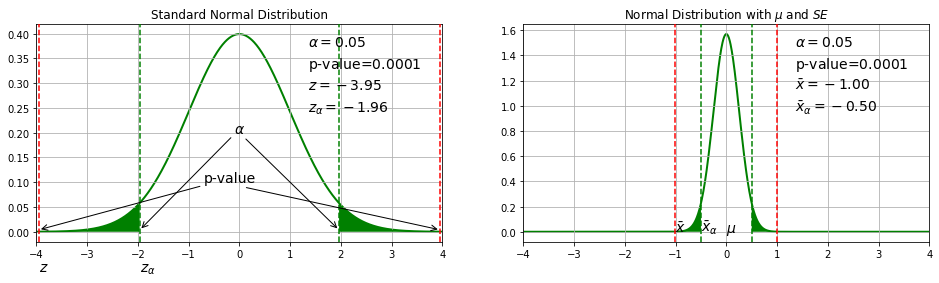

In [45]:
plt.figure(1, figsize=[16,4])

plt.subplot(1,2,1)
plot_stats.plot_two_tailed_pvalue_for_standard_norm(z, alpha, xlim=(-4,4))
plt.subplot(1,2,2)
plot_stats.plot_two_tailed_pvalue_for_norm(x_bar_diff, 0, se_diff, alpha, xlim=(-4, 4))

plt.show()

<p><b>Средние значения двух выборок</b></p>

<p>Если известны $n_{treated}$, $\bar{x}_{treated}$, $s_{treated}$ и $n_{control}$, $\bar{x}_{control}$, $s_{control}$, то:</p>
<p>$$H_0: \mu_{treated}-\mu_{control}=0$$<p>
<p>$$H_A: \mu_{treated}-\mu_{control} \neq 0$$<p>

$$SE_{\mu_{treated}-\mu_{control}} = \sqrt{\dfrac{\sigma_{treated}^2}{n_{treated}}+\dfrac{\sigma_{control}^2}{n_{control}}} \approx \sqrt{\dfrac{s_{treated}^2}{n_{treated}}+\dfrac{s_{control}^2}{n_{control}}}$$

$$z = \dfrac{(\bar{x}_{treated} - \bar{x}_{control}) - (\mu_{\bar{x}_{treated}} - \mu_{\bar{x}_{control}})}{SE_{\mu_{treated}-\mu_{control}} }$$

***Пример***

Генеральная совокупность (неизвестна)

In [46]:
mu_moscow = 60
sigma_moscow = 20
population_moscow = stats.norm.rvs(size=10000, loc=mu_moscow, scale=sigma_moscow, random_state=1)

mu_london = 70
sigma_london = 30
population_london = stats.norm.rvs(size=10000, loc=mu_london, scale=sigma_london, random_state=1)

Выборка

In [47]:
n_moscow = 60

np.random.seed(1)
sample_moscow = np.random.choice(population_moscow, n_moscow, replace=False)
sample_moscow[:5]

array([65.52497817, 87.84733039, 71.50084885, 46.80321255, 62.2259286 ])

In [48]:
n_london = 50

np.random.seed(1)
sample_london = np.random.choice(population_london, n_london, replace=False)
sample_london[:5]

array([ 78.28746725, 111.77099558,  87.25127327,  50.20481882,
        73.33889289])

Исходные данные

In [49]:
alpha = 0.05 #  уровень значимости

Определить

$$H_0: \mu_{moscow}-\mu_{london}=0$$
$$H_A: \mu_{moscow}-\mu_{london} \neq 0$$

Проверка гипотезы $H_0$

In [50]:
#Среднее значение
x_bar_moscow = sample_moscow.mean()
x_bar_london = sample_london.mean()
print("x_bar_moscow =", x_bar_moscow)
print("x_bar_london\t =", x_bar_london)

#Стандартное отклонение (смещенная оценка)
s_moscow = sample_moscow.std(ddof=0)
s_london = sample_london.std(ddof=0)
print("s_moscow\t =", s_moscow)
print("s_london\t\t =", s_london)

#Стандартная ошибка
se_moscow_london = get_se_two(s_london, n_london, s_moscow, n_moscow)
print("se_moscow_london =", se_moscow_london)

# z-score
z = get_z(x_bar_london-x_bar_moscow, 0, se_moscow_london)
print("z-score\t\t = {}".format(z))

# p-value 
pvalue = get_pvalue_for_two_tailed_norm(z)
print("p-value (normal) = {}".format(pvalue))

print("alpha \t\t= {}".format(alpha))

if alpha > pvalue:
    print("alpha > p-value")
    print("\nОтказываемся от нулевую гипотезы: полагаем, что данные отличаются\n")
else:
    print("alpha <= p-value")
    print("\nПринимаем нулевую гипотезу: нет достаточных доказательств, что данные отличаются")

x_bar_moscow = 59.124827464553945
x_bar_london	 = 68.11184413999284
s_moscow	 = 17.528622702731372
s_london		 = 25.413252035397043
se_moscow_london = 4.2470630414288335
z-score		 = 2.1160544564027486
p-value (normal) = 0.034340176337014305
alpha 		= 0.05
alpha > p-value

Отказываемся от нулевую гипотезы: полагаем, что данные отличаются



*p-value* для t-распределения

In [51]:
s_t_moscow = sample_moscow.std(ddof=1)
s_t_london = sample_london.std(ddof=1)

se_t_moscow_london = get_se_two(s_t_london, n_london, s_t_moscow, n_moscow)
t = get_z(x_bar_london-x_bar_moscow, 0, se_t_moscow_london)

df = get_dof_two(s_t_london, n_london, s_t_moscow, n_moscow)

pvalue_t = get_pvalue_for_two_tailed_tdistribution(t, df)

print("t-score = {}".format(t))
print("p-value (t) = {}".format(pvalue_t))

t-score = 2.0957957524718918
p-value (t) = 0.03909494850434726


или

In [52]:
tvalue, pvalue_t = stats.ttest_ind(sample_london, sample_moscow, equal_var=False)
print("t-score = {}".format(tvalue))
print("p-value = {}".format(pvalue_t))

t-score = 2.0957957524718918
p-value = 0.03909494850434729


или

In [53]:
tvalue, pvalue_t = stats.ttest_ind_from_stats(x_bar_london, s_t_london, n_london, x_bar_moscow, s_t_moscow, n_moscow, equal_var=False)
print("t-score = {}".format(tvalue))
print("p-value = {}".format(pvalue_t))

t-score = 2.0957957524718918
p-value = 0.03909494850434729


In [54]:
pvalue_t = 2 * stats.t.cdf(-abs(tvalue), df)
pvalue_t

0.03909494850434726

Графики

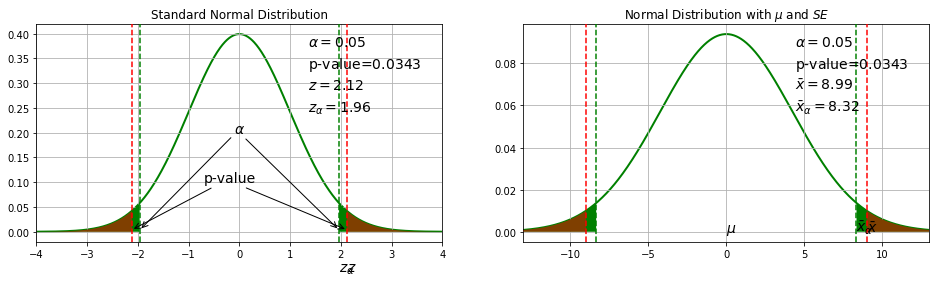

In [55]:
plt.figure(1, figsize=[16,4])

plt.subplot(1,2,1)
plot_stats.plot_two_tailed_pvalue_for_standard_norm(z, alpha, xlim=(-4,4))
plt.subplot(1,2,2)
plot_stats.plot_two_tailed_pvalue_for_norm(x_bar_london-x_bar_moscow, 0, se_moscow_london, alpha, xlim=(-13, 13))

plt.show()

<a name="6"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">6. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

Кремер Н.Ш. Теория вероятностей и математическая статистика<br>
<a href="https://www.openintro.org/book/os/">OpenIntro Statistics 3rd Edition</a><br>
<a href="http://www.kean.edu/~fosborne/bstat/07b2means.html">Hypothesis Testing of the Difference Between Two Population Means</a><br>
<a href="https://www.khanacademy.org/math/probability/statistics-inferential">Inferential statistics</a><br>